# (Ford GoBike System Analysis )

## by (Eman Abdelhalim)

## Investigation Overview

> In this investigation I wanted to find answers for my questions which are :
  -  Top 5 stations with the most starts ?
  -   Most popular trips (based on start station and stop station)
  -  when are most trips taken in terms of time of day or day of week?
  -  Most popular trips based on average duration (second).
  -  Does the average trip duration depend on if a user is a subscriber or customer?
   
> So the main focus was on 8 features of rides (duration_sec, start_time, end_time, start_station_name,end_station_name, bike_id, user_type, member_gender)

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area and the data consistwd of 16 features and attributes of approximately 183412 rides, the attributes included duration second of rides and time that trips started and ended in it aslo stations name ,user and gender types. 8265 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#drop null values
df.dropna(inplace=True)

## (Distribution of duration by seconds for rides)

> duration (second) in dataset taken a large range of values, from about 60 sec to 21,000 sec at the highest. plotted on a log scale, and the distribution takes a unimodel shape

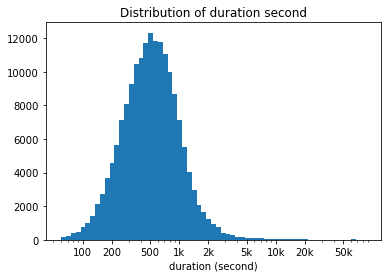

In [4]:
# put duration second on a log scale to handle the skweed tails
log_binsize = 0.05
bins = 10** np.arange(1.78, np.log10(df['duration_sec'].max())+log_binsize,log_binsize)

plt.hist(data=df, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks([100,200,500, 1e3, 2e3, 5e3,1e4,2e4,5e4], [100,200,500, '1k', '2k', '5k','10k','20k','50k'])
plt.xlabel('duration (second)')
plt.title('Distribution of duration second');

## 1- Top 5 stations

> we can see top station with most starts is : Market St at 10th St (3649 times of start)

In [5]:
# order the most popular start stations 
start_station_counts = df['start_station_name'].value_counts()
start_station_order = start_station_counts.index[:5]

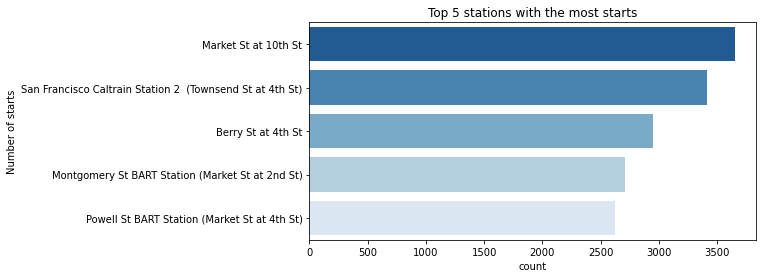

In [6]:
#explore the most start station
plt.figure(figsize=[8,4])
sb.countplot(data=df, y='start_station_name', palette= 'Blues_r', order=start_station_order)
plt.ylabel('Number of starts')
plt.title('Top 5 stations with the most starts');


## 2-  Most popular trips (based on start station and stop station)

> as we can see Most popular trips by number of trips is:Berry St at 4th St & San Francisco Ferry Building (327 trips)


In [7]:
#make new column for all trips combine start station and end station
df['trips'] = df['start_station_name']+ ' & ' + df['end_station_name']
## order the most popular trips 
trips_counts = df['trips'].value_counts()
trips_order = trips_counts.index[:10]

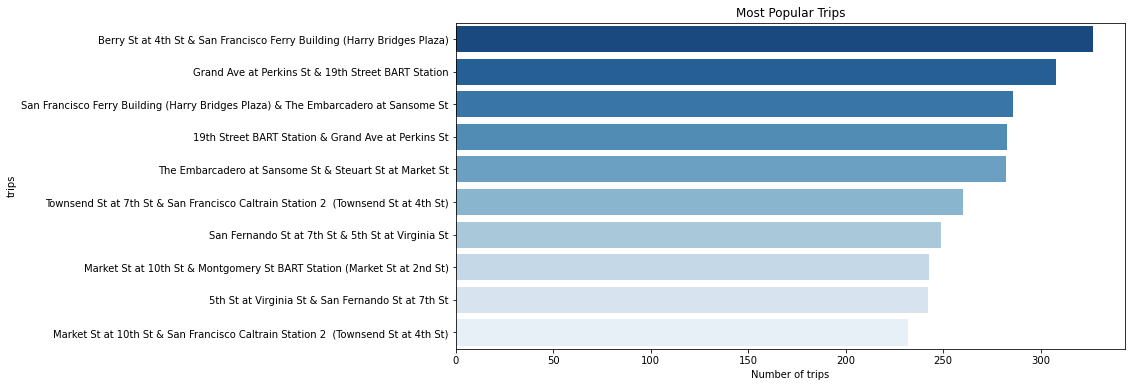

In [8]:
#plot the most popular trips 
plt.figure(figsize=[12,6])
sb.countplot(data=df, y='trips', palette= "Blues_r", order=trips_order)
plt.xlabel('Number of trips')
plt.title('Most Popular Trips');

## 3-  Most popular times of day trips started in it

> as we can see the most popular times of the day trips starts in are : 5 PM, 8AM, 6PM, 9AM, 4PM. so most customers and subscribers prefer to use bikes in the earlier times of morning and afternoon times.

In [9]:
#convert column with dates to datetime type then extract hour from the Start Time column to create an hour column
df['start_time']= pd.to_datetime(df['start_time'], errors='coerce')
df['hour']= df['start_time'].dt.hour
## order the most popular times of day
hour_counts = df['hour'].value_counts()
hour_ordered = hour_counts.index[:5]

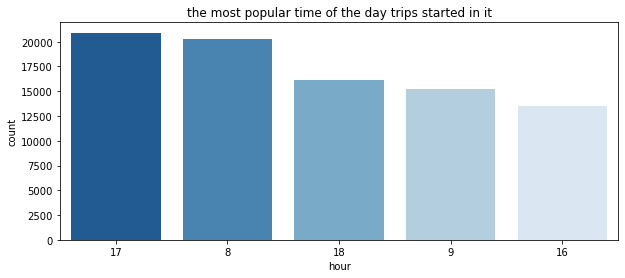

In [10]:
#plot the most popular start hour
plt.figure(figsize= [10,4])
sb.countplot(data = df, x='hour', palette = "Blues_r", order=hour_ordered )
plt.title('the most popular time of the day trips started in it');

## 4-  Most popular day of week trips started in it

> as we can see most popular trips take place in 28-02-2019 and 21-02-2019 and 19-02-2019 Which falls on Thursdays in every week that mean most trips taken in thursdays

In [11]:
# extract day from the Start Time and end time columns to create day columns
df['day']= df['start_time'].dt.day
day_counts = df['day'].value_counts()
day_ordered = day_counts.index[:5]

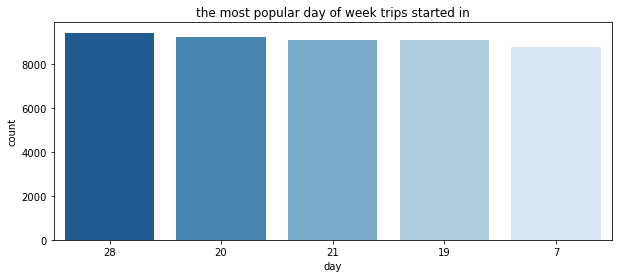

In [12]:
#plot the most popular day in start time
plt.figure(figsize= [10,4])
sb.countplot(data = df, x='day',palette = "Blues_r", order=day_ordered );
plt.title('the most popular day of week trips started in' );


## 5- Most popular trips based on average duration (second).

>Most popular trips by seconed used is : Fell St at Stanyan St & Fell St at Stanyan St (390598 seconds used)

In [13]:
#calculate the sum of duration seconds used in every trip 
trips_df =  df.groupby('trips')['duration_sec'].sum()
trips_df =  trips_df.reset_index(name= 'seconds_used')
trips_df_ordered = trips_df.sort_values('seconds_used', ascending = False)[:5]
trips_df_ordered

,trips,seconds_used
9397,Fell St at Stanyan St & Fell St at Stanyan St,390598
5861,Berry St at 4th St & San Francisco Ferry Build...,207316
16432,Page St at Scott St & Page St at Scott St,186337
18835,San Francisco Ferry Building (Harry Bridges Pl...,156497
20762,The Embarcadero at Sansome St & The Embarcader...,151841


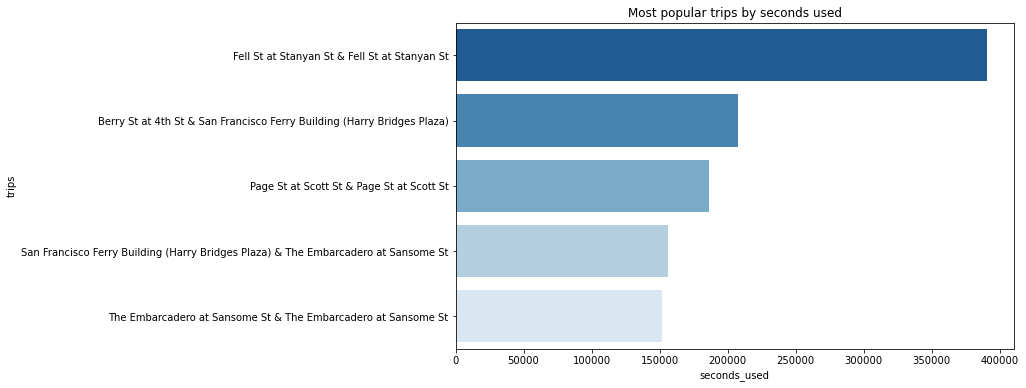

In [14]:
#plot the most popular trips based on seconds used
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
sb.barplot(data= trips_df_ordered, y='trips', x ='seconds_used',palette = 'Blues_r')
plt.title('Most popular trips by seconds used');

## 6-  Average trip duration based on user type.
> as we can see it looks the customers using bikes longer than the subscribers despite of number of customer users less than subscriber users 


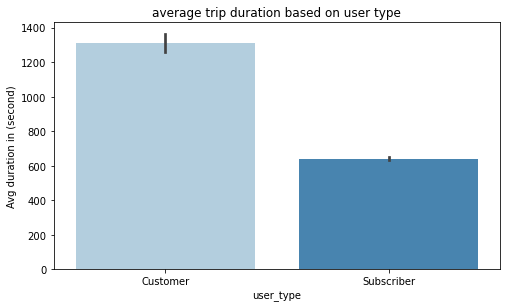

In [15]:
#plot average duration in seconds based on the user type
plt.figure(figsize=[8,10])
defualt_color = sb.color_palette()[0]

plt.subplot(2,1,2)
sb.barplot(data = df, x='user_type', y='duration_sec', palette = 'Blues')
plt.title('average trip duration based on user type')
plt.ylabel('Avg duration in (second)');

## 7- Average trip duration (based on the user type and gender type).

>as we can see that females customers using  bikes longer than male custmers 
and aslo females subscribers using  bikes longer than male subscribers which is mean females used bikes more than males

In [16]:
#make sub data for only the main two gender female and male
df_sub = df.loc[df['member_gender'].isin(['Male','Female'])]

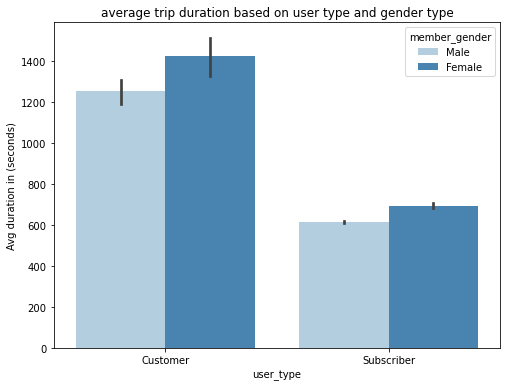

In [17]:
#plot average duration in seconds based on the user type and gender type
plt.figure(figsize=[8,6])
sb.barplot(data= df_sub, x= 'user_type', y='duration_sec',hue='member_gender',palette = 'Blues')
plt.ylabel('Avg duration in (seconds)')
plt.title('average trip duration based on user type and gender type');